In [ ]:
'''
Observations
------------------
1. There is strong correlation between temperature and latitude 
in both the northern and southern hemispheres, r = -0.8 and 0.6 respectively
This is because increasing latitude or longitude represent moving further from 
the equator, where there is the most direct sunlight

2. There is a poor correlation between humidity and latitude 
While humidity increases closer to equator, (r=0.2 in the northern hemisphere, 
r= in the southern hemisphere), humidity is also ifluenced by proximity to bodies of water.
This is why Long Island in the Bahamas more humid than the Sahara, even though they're
both around 23 degrees N

3. Little correlation exists between cloudiness and latitude 
(r= 0.2 for the northern hemisphere, r = 0.4 for the southern hemispere)
Cloud cover is influenced by factors such as humidity, topography and air temperature which 
can all vary along a single line of latitude 

'''

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint
import scipy.stats as sp

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

In [70]:
#Create lists for holding parameters
lats = []
longs = []
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
# create counters 
city_counter = 0
set_counter = 1

In [71]:
#Create parameters for api call
#api.openweathermap.org/data/2.5/weather?q=  London  &appid={  API key  }

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
endd = f'&units=imperial&appid={api_key}'


In [72]:
#for loop to populate lists with needed data from api calls 
print('Beginning Data Retrieval\n-----------------------------')

for city in cities: 
    url = base_url+city+endd
    
    #if city data is found - populate the lists      
    try:
        response = requests.get(url).json()
        city_name.append(response['name'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        
        if city_counter >50: #each set will house 51 cities
            city_counter = 1
            set_counter += 1 
        else:
            city_counter +=1
         #create print log as cities are processed
        print(f'Processing Record {city_counter} of Set {set_counter} | {city}')    
            
    #if city data not found, then skip, and print that we're skipping
    except Exception:
        print('City not found. Skipping...')
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | manokwari
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | kalush
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | adet
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | port hardy
City not found. Skipping...
Processing Record 13 of Set 1 | kapaa
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | igrim
City not found. Skipping...
Processing Record 18 of Set 1 | sivaki
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | ushuaia
City not foun

Processing Record 37 of Set 4 | trelew
Processing Record 38 of Set 4 | aranos
Processing Record 39 of Set 4 | sisimiut
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | kandrian
Processing Record 42 of Set 4 | bodhan
Processing Record 43 of Set 4 | suntar
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | topolovgrad
City not found. Skipping...
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | mizan teferi
Processing Record 50 of Set 4 | lakatoro
Processing Record 51 of Set 4 | omsukchan
Processing Record 1 of Set 5 | lavrentiya
City not found. Skipping...
Processing Record 2 of Set 5 | palauig
Processing Record 3 of Set 5 | sambava
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | athabasca
City not found. Skipping...
Processing Record 7 of Set 5 | codrington
Processing Rec

Processing Record 23 of Set 8 | taunggyi
Processing Record 24 of Set 8 | sao borja
Processing Record 25 of Set 8 | kanye
Processing Record 26 of Set 8 | guiong
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | novoderevyankovskaya
Processing Record 29 of Set 8 | borogontsy
Processing Record 30 of Set 8 | dali
Processing Record 31 of Set 8 | nortelandia
Processing Record 32 of Set 8 | poso
Processing Record 33 of Set 8 | buraydah
Processing Record 34 of Set 8 | san ramon
City not found. Skipping...
Processing Record 35 of Set 8 | umtata
Processing Record 36 of Set 8 | airai
City not found. Skipping...
Processing Record 37 of Set 8 | meadow lake
Processing Record 38 of Set 8 | abu kamal
City not found. Skipping...
Processing Record 39 of Set 8 | belyy yar
City not found. Skipping...
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | baculin
Processing Record 42 of Set 8 | gouyave
Processing Record 43 of Set 8 | sosnogorsk
Processing Record 44 o

Processing Record 5 of Set 12 | impfondo
Processing Record 6 of Set 12 | nicoya
-----------------------------
Data Retrieval Complete
-----------------------------


In [82]:
#Combining the lists into Data Frames 
weather_df = pd.DataFrame({
    'City' : city_name,
    'Cloudiness' : cloudiness,
    'Country' : countries,
    'Date' : dates,
    'Humidity' : humidity,
    'Lat' : lats,
    'Lng' : longs,
    'Max Temp' : max_temp,
    'Wind Speed': wind_speed
})

#exporting the weather data frame to csv 
weather_df.to_csv(output_data_file)

#displaying data frame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Klaksvík,95,FO,1604789124,81,62.23,-6.59,42.80,5.82
1,Manokwari,99,ID,1604789124,73,-0.87,134.08,82.56,3.58
2,Saint-Philippe,0,RE,1604789124,77,-21.36,55.77,71.60,5.82
3,Ancud,0,CL,1604789124,51,-41.87,-73.82,62.60,8.05
4,Kalush,0,UA,1604788888,86,49.01,24.37,44.02,2.21
...,...,...,...,...,...,...,...,...,...
562,Homer,90,US,1604789200,100,59.64,-151.55,39.00,4.81
563,Podosinovets,98,RU,1604789200,95,60.28,47.07,34.61,12.41
564,Bagumbong,86,PH,1604789200,88,6.90,124.52,76.71,2.19
565,Impfondo,68,CG,1604789201,97,1.64,18.07,71.28,2.95


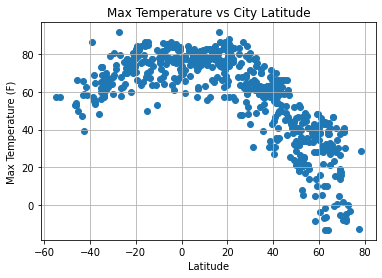

In [54]:
# Scatter plot of Max Temperature vs Latitude 
plt.scatter(weather_df['Lat'],weather_df['Max Temp'])
plt.title('Max Temperature vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(axis='both')
plt.savefig('All-Hemi-TempvsLat.png')
plt.show()

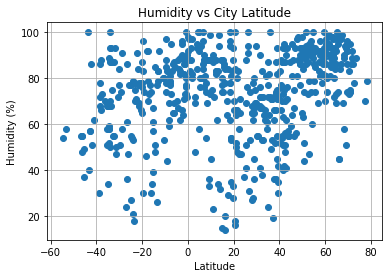

In [53]:
# Scatter plot of Humidity vs Latitude 
plt.scatter(weather_df['Lat'],weather_df['Humidity'])
plt.title('Humidity vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(axis='both')
plt.savefig('All-Hemi-HumidityvsLat.png')
plt.show()

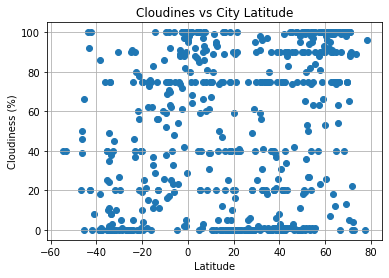

In [52]:
# Scatter plot of Cloudiness vs Latitude 
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'])
plt.title('Cloudines vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(axis='both')
plt.savefig('All-Hemi-CloudvsLat.png')
plt.show()

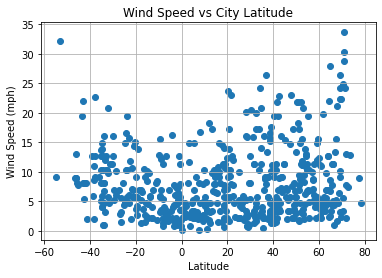

In [51]:
# Scatter plot of Windspeed vs Latitude 
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'])
plt.title('Wind Speed vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(axis='both')
plt.savefig('All-Hemi-WindvsLat.png')
plt.show()

In [7]:
#Create Plots for northern Hemisphere with linear regression 
northern_weather_df = weather_df.loc[weather_df['Lat'] >0]
southern_weather_df = weather_df.loc[weather_df['Lat'] <0]

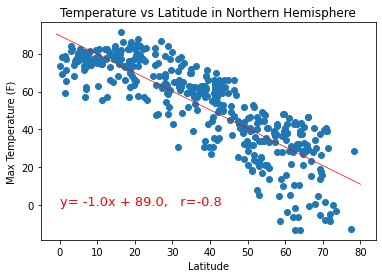

In [42]:
#Northern Hemisphere Temperature vs Latitude
plt.scatter(northern_weather_df['Lat'],northern_weather_df['Max Temp'])
plt.title('Temperature vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(northern_weather_df['Lat'],northern_weather_df['Max Temp'])

# calculate regression and plot regression line over existing scatter plot
x_reg = np.arange(min(northern_weather_df['Lat'])-1,max(northern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (0,0), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('NorthernHemi-TempvsLat.png')
plt.show()

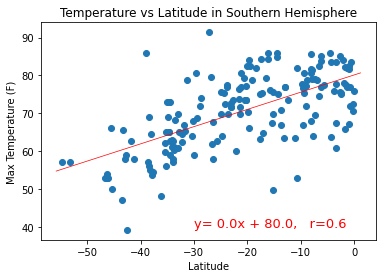

In [43]:
#Southern Hemisphere Temperature vs Latitude
plt.scatter(southern_weather_df['Lat'],southern_weather_df['Max Temp'])
plt.title('Temperature vs Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(southern_weather_df['Lat'],southern_weather_df['Max Temp'])
#plot regression over existing scatter plot
x_reg = np.arange(min(southern_weather_df['Lat'])-1,max(southern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (-30,40), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('SouthernHemi-TempvsLat.png')
plt.show()

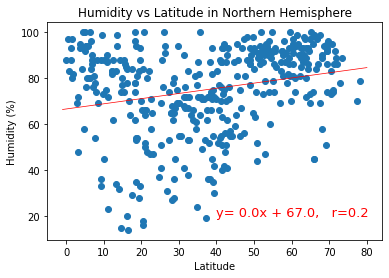

In [44]:
#Northern Hemisphere Humidity vs Latitude
plt.scatter(northern_weather_df['Lat'],northern_weather_df['Humidity'])
plt.title('Humidity vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(northern_weather_df['Lat'],northern_weather_df['Humidity'])

# calculate regression and plot regression line over existing scatter plot
x_reg = np.arange(min(northern_weather_df['Lat'])-1,max(northern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (40,20), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('NorthernHemi-HumvsLat.png')
plt.show()

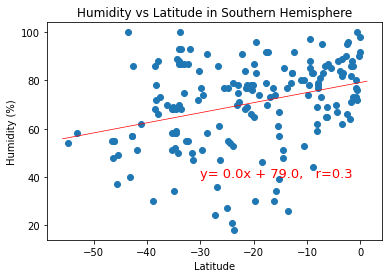

In [45]:
#Southern Hemisphere Humidity vs Latitude
plt.scatter(southern_weather_df['Lat'],southern_weather_df['Humidity'])
plt.title('Humidity vs Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(southern_weather_df['Lat'],southern_weather_df['Humidity'])

#plot regression over existing scatter plot
x_reg = np.arange(min(southern_weather_df['Lat'])-1,max(southern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (-30,40), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('SouthernHemi-HumvsLat.png')
plt.show()

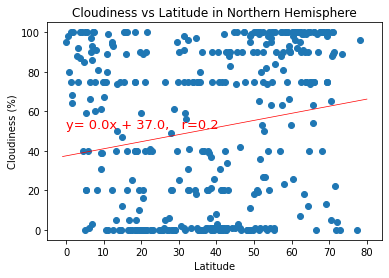

In [46]:
#Northern Hemisphere Cloudiness vs Latitude
plt.scatter(northern_weather_df['Lat'],northern_weather_df['Cloudiness'])
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(northern_weather_df['Lat'],northern_weather_df['Cloudiness'])

# calculate regression and plot regression line over existing scatter plot
x_reg = np.arange(min(northern_weather_df['Lat'])-1,max(northern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (0,51.5), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('NorthernHemi-CloudvsLat.png')
plt.show()

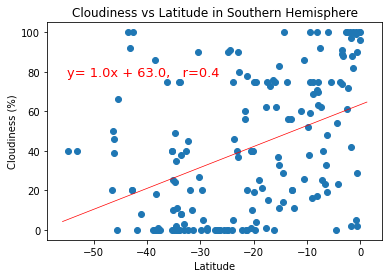

In [47]:
#Southern Hemisphere Cloudiness vs Latitude
plt.scatter(southern_weather_df['Lat'],southern_weather_df['Cloudiness'])
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(southern_weather_df['Lat'],southern_weather_df['Cloudiness'])

#plot regression over existing scatter plot
x_reg = np.arange(min(southern_weather_df['Lat'])-1,max(southern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (-55,78), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('SouthernHemi-CloudvsLat.png')
plt.show()

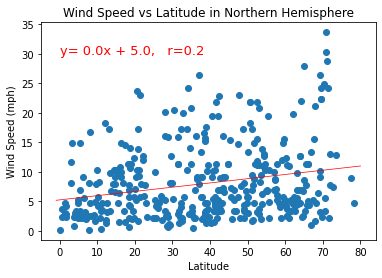

In [48]:
#Northern Hemisphere Wind speed vs Latitude
plt.scatter(northern_weather_df['Lat'],northern_weather_df['Wind Speed'])
plt.title('Wind Speed vs Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(northern_weather_df['Lat'],northern_weather_df['Wind Speed'])

# calculate regression and plot regression line over existing scatter plot
x_reg = np.arange(min(northern_weather_df['Lat'])-1,max(northern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (0,30), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('NorthernHemi-WindvsLat.png')
plt.show()

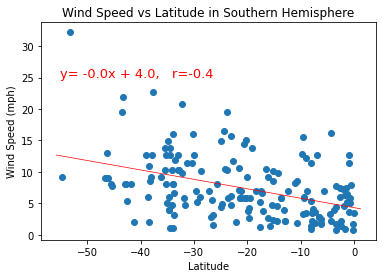

In [49]:
#Southern Hemisphere Wind Speed vs Latitude
plt.scatter(southern_weather_df['Lat'],southern_weather_df['Wind Speed'])
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
slope, intercept, rvalue, pvalue, stderr = sp.linregress(southern_weather_df['Lat'],southern_weather_df['Wind Speed'])

#plot regression over existing scatter plot
x_reg = np.arange(min(southern_weather_df['Lat'])-1,max(southern_weather_df['Lat'])+2,1)
y_reg = slope * x_reg + intercept
eq = f'y= {str(round(slope))}x + {str(round(intercept))},   r={str(round(rvalue,1))}'
plt.annotate(eq, (-55,25), color='red', size='13')
plt.plot(x_reg, y_reg, color='red', linewidth='0.7')
plt.savefig('SouthernHemi-WindvsLat.png')
plt.show()